In [26]:

import tifffile as tf
import zarr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
from scipy.spatial import KDTree
import numpy as np
import pandas as pd
import zarr
from scipy.spatial import KDTree
import tifffile as tf
import matplotlib.pyplot as plt
from tqdm import tqdm
import dask.array as da
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance




In [16]:
testdf = pd.read_csv('/Users/swarchol/Research/bed/data/for_simon/unmicst-WD-76845-097_cellRing.csv')


In [13]:
# test2cluster = pd.read_csv('/Volumes/Simon/Greg/cluster.csv')

In [14]:
# test2cluster.head

<bound method NDFrame.head of          CellID      Hoechst0      Hoechst1      Hoechst2  anti_CD3  \
0        276122  28468.439306  52665.294798  46069.202312  0.189094   
1       1081247  21939.394737  32398.289474  30214.552632  0.224486   
2        258337  24193.435897  34145.961538  31654.179487  0.802225   
3       1141268   8615.829630  16910.185185  14733.333333  0.301108   
4        602490  24921.384615  35716.653846  30646.750000  0.360104   
...         ...           ...           ...           ...       ...   
933248   511213  12242.990196  22733.931373  22455.294118  0.387019   
933249   111249  31908.528302  44001.056604  37828.037736  0.460654   
933250   136288  11896.914286  14164.714286   9725.142857  0.154712   
933251   693714  13619.957746  17095.352113  20142.197183  0.382668   
933252   889679   9303.619565  15619.315217  16932.239130  0.247262   

        anti_CD45RO      Hoechst3  Keratin_570  aSMA_660      Hoechst4  ...  \
0          0.331807  36613.462428     

In [17]:
selection = pickle.load(open('/Users/swarchol/Research/bed/mattress/selection_data.pkl', 'rb'))
csv_path = "/Users/swarchol/Research/exemplar-001/quantification/exemplar-001--unmicst_cell_umap.csv"
csv_df = pd.read_csv(csv_path)

In [18]:
selection
selection_ids = [int(_[0]) for _ in selection['selections'][0]['children'][0]['set']]
# selection_ids
# selection_ids[10]


In [19]:
# drop columns CellID, X_centroid, Y_centroid
csv_df.drop(
    ["CellID", "X_centroid", "Y_centroid", 'Area', 'MajorAxisLength', 'MinorAxisLength',
       'Eccentricity', 'Solidity', 'Extent', 'Orientation','UMAP_X','UMAP_Y'], axis=1, inplace=True
)
csv_df[['DNA_6', 'ELANE', 'CD57', 'CD45', 'CD11B', 'SMA', 'CD16', 'ECAD', 'FOXP3', 'NCAM',"DNA_7", "DNA_8"]] = np.log1p(csv_df[['DNA_6', 'ELANE', 'CD57', 'CD45', 'CD11B', 'SMA', 'CD16', 'ECAD', 'FOXP3', 'NCAM',"DNA_7", "DNA_8"]])


In [20]:
csv_df['in_selection'] = 0
csv_df.loc[selection_ids,'in_selection'] = 1
x_df = csv_df[['DNA_6', 'ELANE', 'CD57', 'CD45', 'DNA_7', 'CD11B', 'SMA', 'CD16',
       'DNA_8', 'ECAD', 'FOXP3', 'NCAM']]

y_df = csv_df[['in_selection']]
feature_names = x_df.columns

In [21]:
forest = RandomForestClassifier(random_state=0)
forest.fit(x_df.values,y_df.values)

/Users/swarchol/mambaforge/envs/napari/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier(random_state=0)

In [24]:
importances = forest.feature_importances_
importances

array([0.07757358, 0.08223429, 0.0975488 , 0.08518634, 0.08322176,
       0.08184778, 0.08273205, 0.08644891, 0.07853503, 0.08062511,
       0.08190654, 0.08213981])

In [27]:
result = permutation_importance(
    forest, x_df, y_df, n_repeats=10, random_state=42, n_jobs=2
)

/Users/swarchol/mambaforge/envs/napari/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/swarchol/mambaforge/envs/napari/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/swarchol/mambaforge/envs/napari/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/swarchol/mambaforge/envs/napari/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/swarchol/mambaforge/envs/napari/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [28]:
result

{'importances_mean': array([0.01811101, 0.02393017, 0.03692032, 0.02818263, 0.02728738,
        0.02926589, 0.02506714, 0.02602507, 0.02624888, 0.02258729,
        0.02905998, 0.03145031]),
 'importances_std': array([0.00056486, 0.00074263, 0.00050833, 0.00080752, 0.00078843,
        0.00061565, 0.00070492, 0.00072516, 0.00114144, 0.00099695,
        0.00104879, 0.00100576]),
 'importances': array([[0.01808415, 0.01736795, 0.01853178, 0.01906893, 0.01763653,
         0.01736795, 0.01799463, 0.01835273, 0.01888988, 0.01781558],
        [0.02309758, 0.02452999, 0.02497762, 0.02363474, 0.02318711,
         0.02318711, 0.02515667, 0.02318711, 0.02417189, 0.02417189],
        [0.03715309, 0.03697404, 0.03688451, 0.03634736, 0.03688451,
         0.03688451, 0.03581021, 0.03751119, 0.03769024, 0.03706356],
        [0.02811101, 0.02963295, 0.02864816, 0.02721576, 0.02882722,
         0.02730528, 0.02766338, 0.02712623, 0.02900627, 0.02829006],
        [0.02712623, 0.02748433, 0.02855864, 0.028

: 

In [124]:
feat_imp = [{'value':forest_importances.values[i],'feature':feature_names[i]} for i in range(len(feature_names))]

In [125]:
feat_imp

[{'value': 0.018111011638316944, 'feature': 'DNA_6'},
 {'value': 0.023930170098478077, 'feature': 'ELANE'},
 {'value': 0.03692032229185319, 'feature': 'CD57'},
 {'value': 0.02818263205013429, 'feature': 'CD45'},
 {'value': 0.02728737690241719, 'feature': 'DNA_7'},
 {'value': 0.029265890778871984, 'feature': 'CD11B'},
 {'value': 0.02506714413607878, 'feature': 'SMA'},
 {'value': 0.026025067144136094, 'feature': 'CD16'},
 {'value': 0.026248880931065355, 'feature': 'DNA_8'},
 {'value': 0.02258728737690242, 'feature': 'ECAD'},
 {'value': 0.029059982094897064, 'feature': 'FOXP3'},
 {'value': 0.03145031333930169, 'feature': 'NCAM'}]

/Users/swarchol/mambaforge/envs/napari/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/swarchol/mambaforge/envs/napari/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/swarchol/mambaforge/envs/napari/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/swarchol/mambaforge/envs/napari/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/Users/swarchol/mambaforge/envs/napari/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Elapsed time to compute the importances: 6.450 seconds


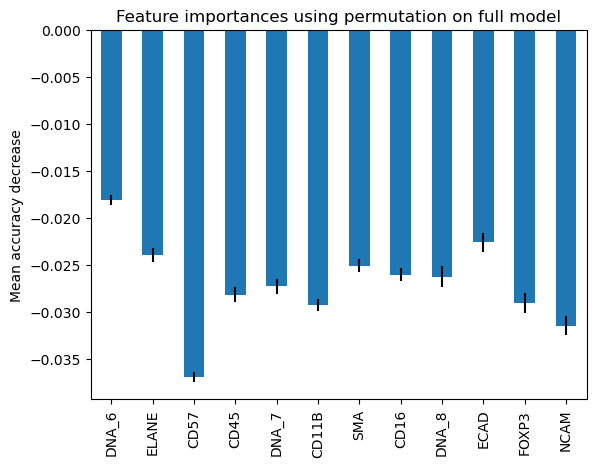

In [126]:
csv_df['in_selection'] = 1
csv_df.loc[selection_ids,'in_selection'] = 0
x_df = csv_df[['DNA_6', 'ELANE', 'CD57', 'CD45', 'DNA_7', 'CD11B', 'SMA', 'CD16',
       'DNA_8', 'ECAD', 'FOXP3', 'NCAM']]

y_df = csv_df[['in_selection']]
feature_names = x_df.columns
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    forest, x_df, y_df, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
plt.show()